In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xlsxwriter
%matplotlib inline

## Gas Energy balance
Backward difference for both time and space

Overall Gas energy balance
<br> <br>
-$\rho$u$C_{p,g}$$\frac{\delta T_g}{\delta x}$
$+$ $\frac{\delta}{\delta x}$($k_{g}$$\frac{\delta T_g}{\delta x}$)
$-$ $h_{f}$$a_{f}$($T_{g}$-$T_{s}$) $=$ $\rho$$C_{p,g}$$\frac{\delta T_g}{\delta t}$
<br> <br>

In [2]:
def parameters(var):
    δx,δt = var
    ρ = ρg
    Cp = Cpg
    A = -δt*h*a/(V*ρ*Cp) + kg*δt/(ρ*Cp*δx**2) - u*δt/δx - 1
    B = -2*kg*δt/(ρ*Cp*δx**2) + u*δt/δx
    C = kg*δt/(ρ*Cp*δx**2)
    D = -δt*h*a/(V*ρ*Cp)
    
    
#     A = -δt*h*a/(V*ρ*Cp) + kg*δt/(ρ*Cp*δx**2) + u*δt/δx - 1
#     B = -2*kg*δt/(ρ*Cp*δx**2) - u*δt/δx
#     C = kg*δt/(ρ*Cp*δx**2)
#     D = -δt*h*a/(u*ρ*Cp)
    
#     A = -δt*h*a/(V*ρ*Cp) + kg*δt/(ρ*Cp*δx**2) - u*δt/δx - 1
#     B = 2*kg*δt/(ρ*Cp*δx**2) + u*δt/δx
#     C = kg*δt/(ρ*Cp*δx**2)
#     D = δt*h*a/(u*ρ*Cp)
    return A,B,C,D

In [3]:
def Matrix(var):
    N,δx,δt = var
    
    M = np.zeros((N,N))
    
    for i in range(N):
        A,B,C,D = parameters([δx,δt])
        if i == 0:
            M[0,0] = 1
        elif i == N:
            M[N,N] = A+B
            M[N,N-2] = C
        else:
            M[i,i] = A 
            M[i,i-1] = B
            M[i,i-2] = C
    return M

In [4]:
def Ans_Matrix(var):
    A_in,N,δx,δt = var
    A,B,C,D = parameters([δx,δt])

    A_times = np.full((N,1),-1)
    A_times[0,0] = 1
    A_add = np.full((N,1),D*Ts)
    A_add[0,0] = 0
    A = A_in*A_times + A_add
    return A

In [5]:
def Temp_check(var):
    Y,N = var
    for i in range(N):
        if Y[i,0]>Ts:
            Y[i,0] = Ts
        elif Y[i,0] < To:
            Y[i,0] = To
        else:
            Y[i,0] = Y[i,0]
    return Y

In [6]:
def Simulation(var):
    Nt,N,δx,δt = var
    A_in = np.full((N,1),To)
    for i in range(Nt):
        A = Ans_Matrix([A_in,N,δx,δt])
        M = Matrix([N,δx,δt])
        Y = np.linalg.solve(M,A)
        
        Y_1 = Temp_check([Y,N])
        
        A_in = Y_1
        A_list.append(A_in)
    return A_list

In [7]:
Cpg = 30/28.7               #Perry 
μg = 4.5E-5                    #Perry
Pr = 0.70                    #Perry pg 2-451
ρg = 0.013*28.7*1000/1000    #Perry pg 2-218

kg = 0.02

D = 1.8
u = 10
L = 5

In [8]:
ρs = 8050
Cps = 560

ks = 20

In [9]:
Re = D*u*ρg/μg
Nu = 0.0296*Re**0.8*Pr**1/3     #Heat and Mass transfer Pg428
h = Nu*kg/L                     #Heat and Mass transfer Pg411
Bi = L*h/ks

In [10]:
h

0.38057186627602746

In [11]:
Time = 3600
N = 100

Nt = 1000

G  = u*ρg     #kg/m2 s 

δt = Time/Nt
δx = (L)/N

Ri = 0.4
a = 2*np.pi*Ri*δx

V = np.pi*Ri**2*δx   # Volume of each step im m3

To = 25+273.15
Ts = 900+273.15
T_initial = 25+273.15

A_list = []
F = Simulation([Nt,N,δx,δt])
δx

0.05

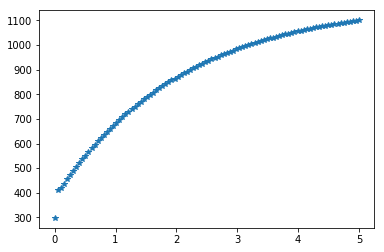

In [12]:
"Temp along the Bed"
Temp_1 = []

point = -1

L_list = np.linspace(0,L,N)
for i in range(N):
    Temp_1.append(F[point][i])

    
ax = plt.subplot(111)
plt.plot(L_list,Temp_1,'*', label = 'Temp_1')

In [13]:
# "End Values"
# Temp_1 = []

# point = -1

# r_list = np.linspace(0,Time,Nt)
# for i in range(Nt):
#     Temp_1.append(F[i][point])

    
# ax = plt.subplot(111)
# plt.plot(r_list,Temp_1,'*', label = 'Temp_1')

In [14]:
workbook = xlsxwriter.Workbook('R_0.4.xlsx')
worksheet = workbook.add_worksheet()

array = [L_list,
         Temp_1]

row = 0

for col, data in enumerate(array):
    worksheet.write_column(row, col, data)
    
workbook.close()